In [55]:
from typing import List, Optional
from autograd import grad, jacobian, elementwise_grad
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from tqdm import tqdm
import math
import scipy 
from scipy import linalg
from numpy import linalg as LA
# from pyblas.level1 import dnrm2

sys.path.insert(0, os.path.join(".."))
%reload_ext autoreload
%autoreload 2

In [56]:
from lib import problems as pr
from lib import optimisers as opt
from lib import utils as ut
from lib.logistic_regression import LogisticRegression

In [57]:
plt.rcParams['figure.figsize'] = 15, 8
# plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

In [185]:
nx=10
ny=10
problem = LogisticRegression.with_parameters(nx=nx, ny=ny, L_x_mu_x=20, L_xy=1.1, mu_xy=1)

In [186]:
print(problem.L_xy, problem.mu_xy)

1.1 0.9999999999999998


In [187]:
print(problem.loss(np.ones(nx), -np.ones(ny)))
print(problem.xopt)
print(problem.yopt)

3.1694692844687054
[ 0.02243195 -0.03410298  0.00773562 -0.02550105  0.03888891  0.0016315
  0.00305823 -0.02587282  0.01467152 -0.02305031]
[ 0.44165713  0.43107916 -0.44467526 -0.43793605 -0.44130577 -0.44410295
 -0.44283431 -0.4366178  -0.44214116 -0.43581619]


In [189]:
params = {"apdg": None,
          'lpd': None,
          'altgd': None,
          'simgd': None,
          # 'avg': None,
          'eg': None,
          'omd': None,
          'AA': None,
          "smm": None
         }

x0 = np.random.randn(nx, )
y0 = np.random.randn(ny, )
iteration = 2000
methods_dict = ut.main(problem, iteration, x0.copy(), y0.copy(), params, eps=1e-6)

LPD: 100%|█████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 461.92it/s]


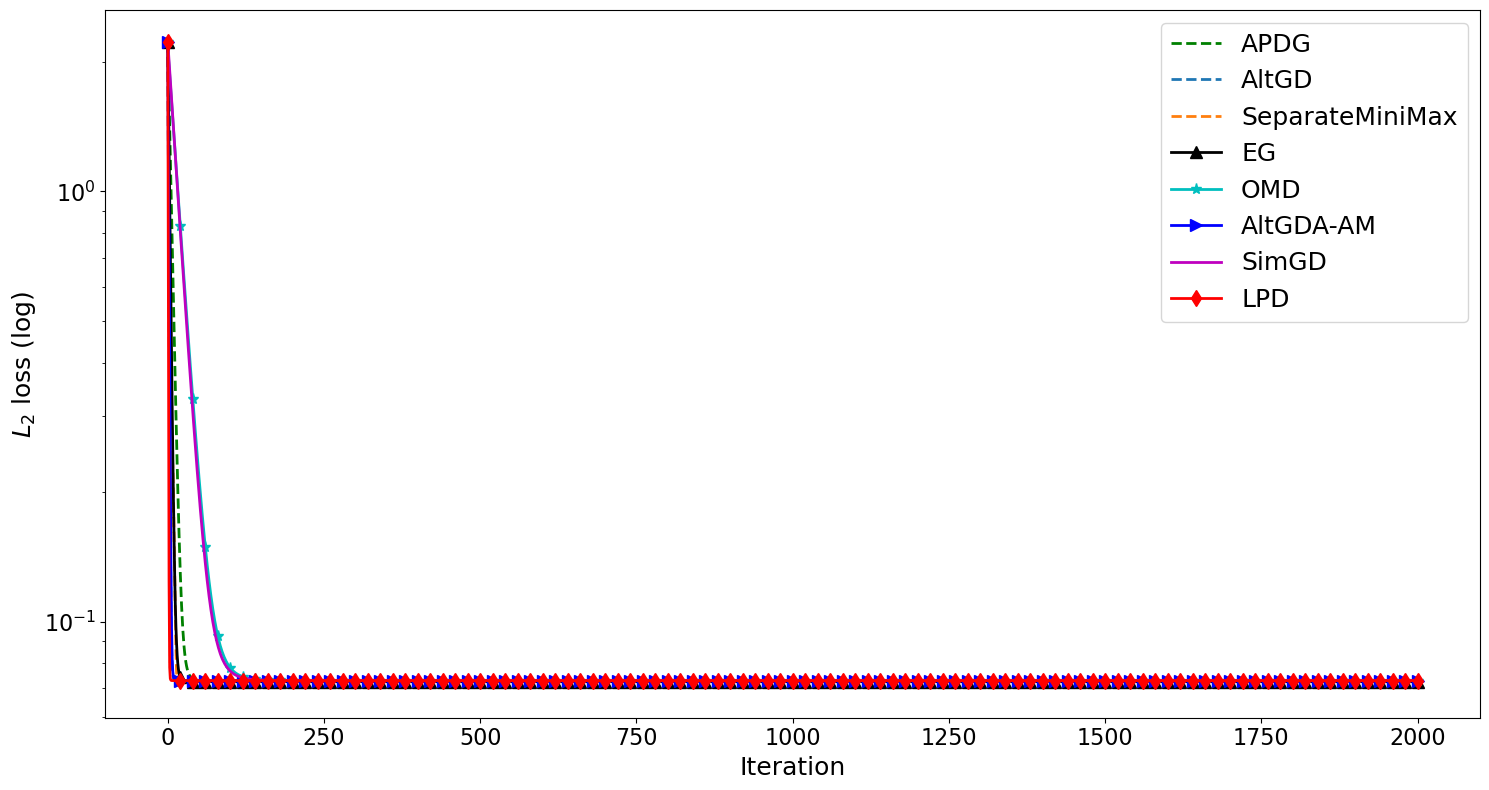

In [190]:
%matplotlib inline
plot_interval = 1
markevery= 20
for method in methods_dict:
    if method not in []:
        plt.semilogy(np.arange(0, len(methods_dict[method]["loss_hist"])+plot_interval-1, plot_interval),
                     methods_dict[method]["loss_hist"][::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
plt.xlabel("Iteration")
plt.ylabel(r"$L_2$ loss (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Logistic_loss_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Logistic_loss_iter{iteration}_nx{nx}_ny{ny}.pdf"))

APDG 49.57397343535829
AltGD 49.57397343535829
SeparateMiniMax 49.57397343535829
EG 49.57397343535829
OMD 49.57397343535829
AltGDA-AM 49.57397343535829
SimGD 49.57397343535829
LPD 49.57397343535829


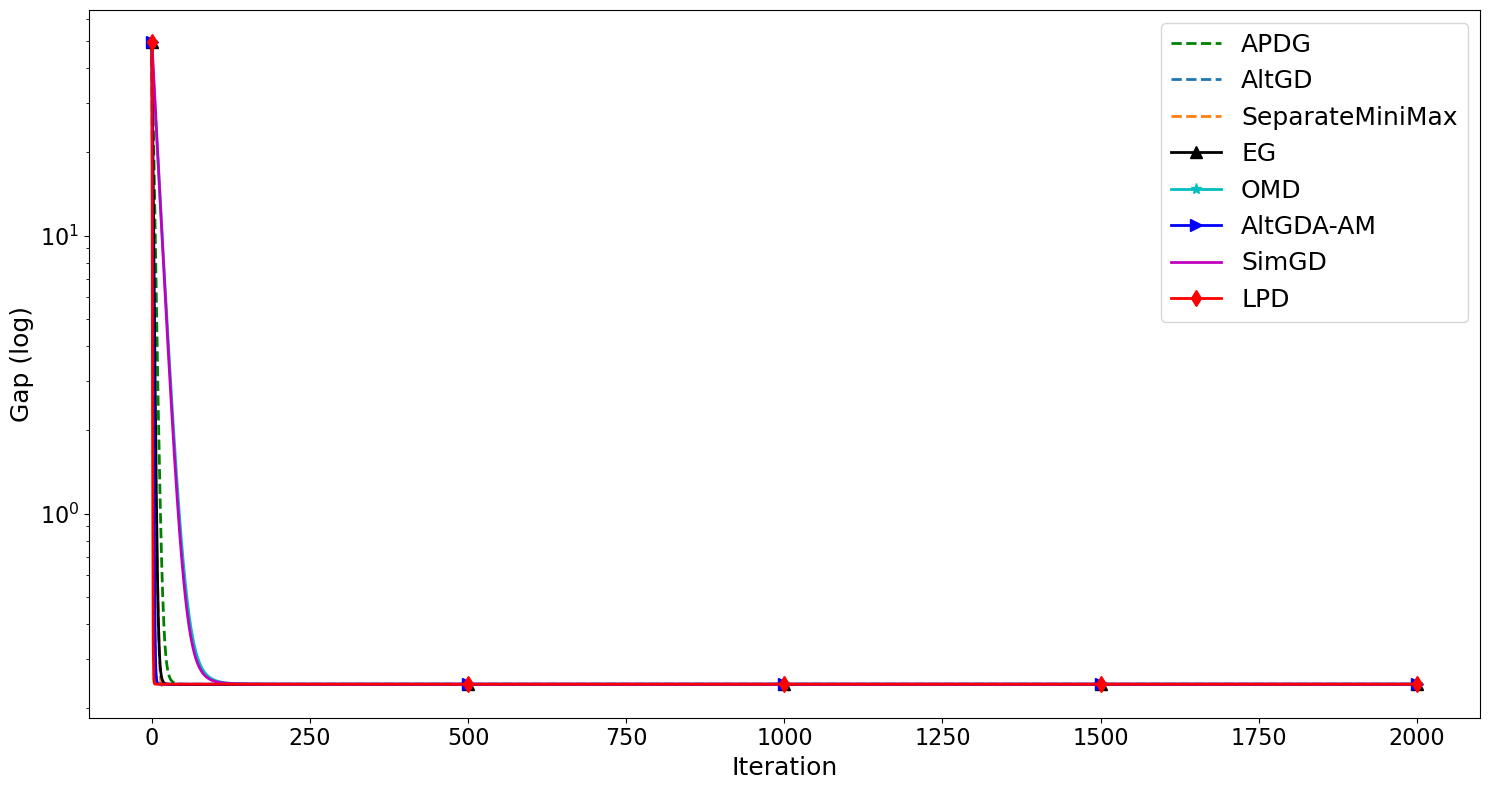

In [191]:
plot_interval = 1
markevery=500
for method in methods_dict:
    if method not in []:
        _gap =methods_dict[method]["class"].all_metrics["gap"]
        print(method, _gap[0])
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Gap (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Logistic_gap_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Logistic_gap_iter{iteration}_nx{nx}_ny{ny}.pdf"))

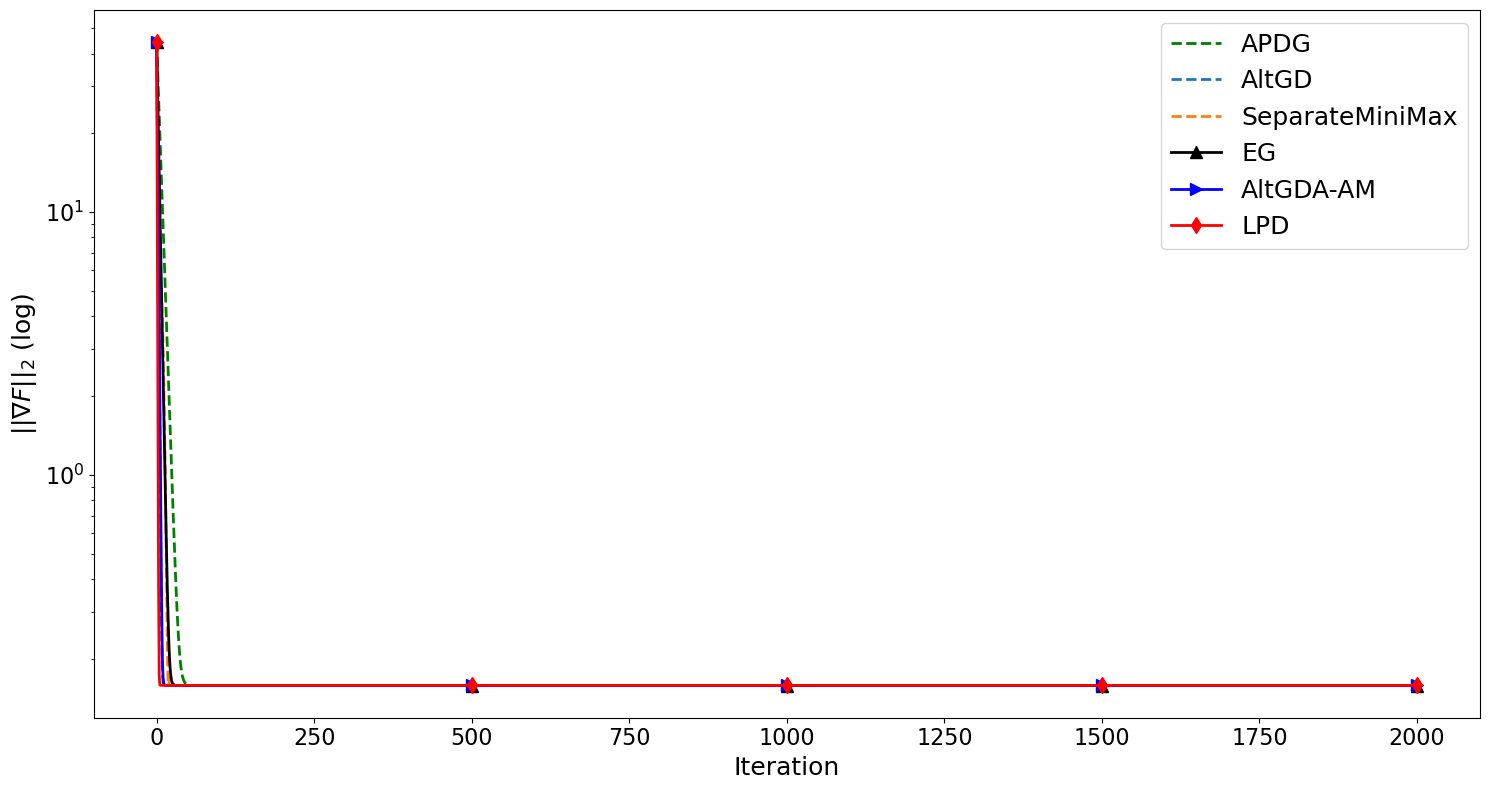

In [192]:
plot_interval = 1
markevery=500
for method in methods_dict:
    if method not in ["OMD", "SimGD"]:
        _gap =methods_dict[method]["class"].all_metrics["grad_norm"]
        plt.semilogy(np.arange(0, len(_gap)+plot_interval-1, plot_interval),
                     _gap[::plot_interval],
                     methods_dict[method]["marker"],
                     markevery=markevery,
                     label=method
                    )
# plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel(r"$||\nabla F||_2$ (log)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join("..", "figures", f"Logistic_norm_iter{iteration}_nx{nx}_ny{ny}.jpg"))
plt.savefig(os.path.join("..", "figures", f"Logistic_norm_iter{iteration}_nx{nx}_ny{ny}.pdf"))